In [ ]:
# pip install jupyter-dash

# Q0: import dash standard libraries

In [1]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")

# Q1: Make dash that prints "Data Science"

In [34]:
app = JupyterDash(__name__)

app.layout= html.Div([
    html.H1('Dara Science')
])

if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



# Q2: Make dash that takes name input and outpt "Welcome to Data Science dashboard {name}"

In [35]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        'Input:',
        dcc.Input(id='my-input', value=' ', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),
])

@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Welcome to Data Science dashboard {input_value}'

if __name__ == '__main__':
    app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



# Q3: Make Plotly-Dash that takes two inputs (numbers) and output 3 numbers x, y , z= x+y
- hint: use html.Div, dcc.Input(type='number')

In [36]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")



app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        "Input: ",
        dcc.Input(id='x', value=' ', type='number')
    ]),
    html.Div([
        "Input: ",
        dcc.Input(id='y', value=' ', type='number')
    ]),
    html.Br(),
    html.Div(id='my-output'),
])

@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='x', component_property='value'),
    Input(component_id='y', component_property='value')
)
def update_output_div(input_value, input_value2):
    return f'Output: {input_value + input_value2}'


if __name__ == '__main__':
    app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: unsupported operand type(s) for +: 'int' and 'str'



# Q4.1: Make JubyterDash with Rangeslider from 1-15 with 6 option

In [37]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")

app2 = JupyterDash(__name__) 

app2.layout = html.Div([
    html.P("Choose from RangeSlide"),
    dcc.RangeSlider(1, 15, step=3)
])
    
# if __name__ == '__main__':
app2.run_server(debug=True, use_reloader=False,mode='inline') 

Dash is running on http://127.0.0.1:8050/



# Q4.2: add to the previous dash: Label, set default value on rangeslider as 7-10

In [38]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")

app3 = JupyterDash(__name__) 

app3.layout = html.Div([
    html.P("Choose from RangeSlide"),
    dcc.RangeSlider(1, 15, step=3, value=[7,10])
])
    
# if __name__ == '__main__':
app3.run_server(debug=True, use_reloader=False,mode='inline') 

Dash is running on http://127.0.0.1:8050/



# Q5: Make 3 different Dcc types (Dropdown - Checkbox...) in one dash

In [39]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")

app = JupyterDash(__name__) 

app.layout = html.Div(children=[
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'Choose 1', 'value': 'Choose1'},
            {'label': 'Choose 2', 'value': 'Choose2'},
            {'label': 'Choose 3', 'value': 'Choose3'}
        ],
        value=' '
    ),

    html.Label('Checkbox'),
    dcc.Checklist(
        options=[
            {'label': 'Choose 1', 'value': 'Choose1'},
            {'label': 'Choose 2', 'value': 'Choose2'},
            {'label': 'Choose 3', 'value': 'Choose3'}
        ],
        value=[' ']
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False,mode='inline')

Dash is running on http://127.0.0.1:8050/



# Q6: Make Plotly chart, then add it to a plotly_dash

In [51]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import numpy as np
import plotly.graph_objects as go


df = np.random.normal(3, 2, size=5) 
fig = px.histogram(df)

app = JupyterDash(__name__) 

app.layout = html.Div(
    dcc.Graph(
        figure=fig
    ))

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False,mode='inline')


Dash is running on http://127.0.0.1:8050/



# Q7: From our data make plotly-dash with suitble chart, and Dropdown.

- Dropdown should contain at least 3 options, each one represents different column.
- Add label to dropdown.
- The chart data should change depending on the selected dropdown option.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("titanic passenger list.csv")
app = JupyterDash(__name__)
dropdown_options = [{'label': 'embarked', 'value': 'embarked'},
                    {'label': 'Sex', 'value': 'sex'},
                    {'label': 'Age', 'value': 'age'}]
# Create the layout of the app
app.layout = html.Div([
    dcc.Dropdown(id='dropdown', options=dropdown_options,value="age"),
    
          dcc.Graph(id="graph")])


@app.callback(
    Output('graph', 'figure'),
    Input('dropdown', 'value'))

def update_chart(column):
    fig = px.histogram(df, x=column)
    return fig


if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



# Q8: add 2 more charts to the prevoius Ploty-Dash

Dash is running on http://127.0.0.1:8050/



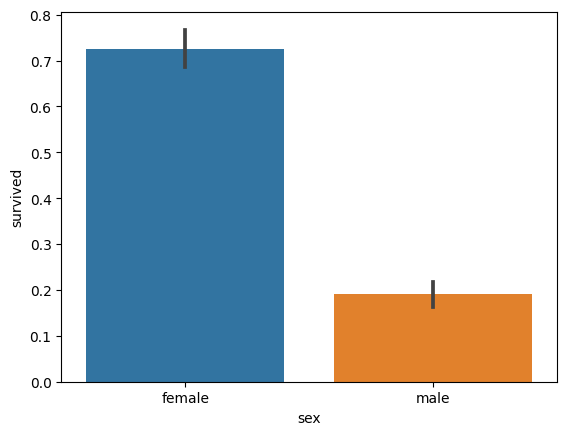

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\dash\_callback.py:491, in register_callback.<locals>.wrap_func.<locals>.add_context(*args=('sex',), **kwargs={})
    490 try:
--> 491     jsonResponse = to_json(response)
        response = {'multi': True, 'response': defaultdict(<class 'dict'>, {'graph1': {'figure': <seaborn.axisgrid.FacetGrid object at 0x00000278EEE44490>}, 'graph2': {'figure': <Axes: xlabel='sex', ylabel='survived'>}})}
    492 except TypeError:

File ~\anaconda3\lib\site-packages\dash\_utils.py:23, in to_json(
    value={'multi': True, 'response': defaultdict(<class 'dict'>, {'graph1': {'figure'...gure': <Axes: xlabel='sex', ylabel='survived'>}})}
)
     21 from plotly.io.json import to_json_plotly
---> 23 return to_json_plotly(value)
        value = {'multi': True, 'response': defaultdict(<class 'dict'>, {'graph1': {'figure': <sea

In [55]:
app = JupyterDash(__name__) 
app.layout = html.Div([
    dcc.Dropdown(id='dropdown', options=['survived',"sex"],value="sex"),
    dcc.Graph(id="graph1"),
    dcc.Graph(id="graph2")

])
@app.callback(
    Output('graph1', 'figure'),
    Output('graph2', 'figure'),
    Input('dropdown', 'value'))

def update_chart(column):
    fig1 = sns.catplot(
    data=df, x="survived", col="embarked",
    kind="count", height=4, aspect=.6,
)
    fig2=sns.barplot(x='sex', y='survived', data= df)

    return fig1,fig2


if __name__ == '__main__':
    app.run_server(mode='inline')

# Q9: Search for "Plotly Gallery" and fetch for a graph and use it with our data.

- Note: You need to put the resourse addres of fetched your grapth.

https://www.python-graph-gallery.com/line-chart/

In [57]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import numpy as np
import plotly.graph_objects as go


fig = px.histogram(df['age'])

app = JupyterDash(__name__) 

app.layout = html.Div(
    dcc.Graph(
        figure=fig
    ))

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False,mode='inline')


Dash is running on http://127.0.0.1:8050/



# Challenge 1.1: Create Plotly dash with two charts depends on different columns of the data
- First Chart : Pie
- Secound Chart: is by your Choice ( Not Pie )

# Challenge 1.2: Make Hovering over a slice of the pie changes the data for the second chart depending on what the slice is.